# 方差分析

种类：单因素方差分析
多因素方差分析。

原理：将测量数据的总变异（即总方差）按照变异来源分为处理（组间）效应和误差（组内）效应，并作出其数量估计，从而确定实验处理对研究结果影响力的大小。

流程：总平方和分解、总自由度分解和F检验。

In [47]:
data = [['甲', 'A', 56.0],
       ['甲', 'A', 55.0],
       ['甲', 'A', 59.0],
       ['甲', 'B', 62.0],
       ['甲', 'B', 61.0],
       ['甲', 'B', 66.0],
       ['甲', 'C', 52.0],
       ['甲', 'C', 50.0],
       ['甲', 'C', 47.0],
       ['乙', 'A', 47.0],
       ['乙', 'A', 45.0],
       ['乙', 'A', 49.0],
       ['乙', 'B', 54.0],
       ['乙', 'B', 50.0],
       ['乙', 'B', 55.0],
       ['乙', 'C', 42.0],
       ['乙', 'C', 45.0],
       ['乙', 'C', 48.0],
       ['丙', 'A', 47.0],
       ['丙', 'A', 49.0],
       ['丙', 'A', 44.0],
       ['丙', 'B', 56.0],
       ['丙', 'B', 52.0],
       ['丙', 'B', 54.0],
       ['丙', 'C', 44.0],
       ['丙', 'C', 49.0],
       ['丙', 'C', 48.0],
       ['丁', 'A', 53.0],
       ['丁', 'A', 57.0],
       ['丁', 'A', 54.0],
       ['丁', 'B', 54.0],
       ['丁', 'B', 61.0],
       ['丁', 'B', 60.0],
       ['丁', 'C', 48.0],
       ['丁', 'C', 51.0],
       ['丁', 'C', 64.0]]

df = pd.DataFrame(data, columns = ['班组', '生产线', 'Index'])
df.head()

,班组,生产线,Index
0,甲,A,56.0
1,甲,A,55.0
2,甲,A,59.0
3,甲,B,62.0
4,甲,B,61.0


In [48]:
df1 = pd.DataFrame()
data_list = []
for i in df.班组.unique():
    for j in df.生产线.unique():
        data = df[(df.班组 == i)&(df.生产线 == j)]['Index'].values
        data_list.append(data)
        df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
df1 = df1.T
df1

C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\2272747748.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\2272747748.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\2272747748.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\2272747748.py:7: FutureWarning: The frame.append method is deprecat

甲                 乙                 丙                 丁            
      A     B     C     A     B     C     A     B     C     A     B     C
0  56.0  62.0  52.0  47.0  54.0  42.0  47.0  56.0  44.0  53.0  54.0  48.0
1  55.0  61.0  50.0  45.0  50.0  45.0  49.0  52.0  49.0  57.0  61.0  51.0
2  59.0  66.0  47.0  49.0  55.0  48.0  44.0  54.0  48.0  54.0  60.0  64.0

# 查看各组数量分布

In [49]:
df1.count().to_frame()

0
甲 A  3
  B  3
  C  3
乙 A  3
  B  3
  C  3
丙 A  3
  B  3
  C  3
丁 A  3
  B  3
  C  3

# 箱线图查看异常值

C:\Users\xiaochang\py3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30002 (\N{CJK UNIFIED IDEOGRAPH-7532}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\xiaochang\py3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20057 (\N{CJK UNIFIED IDEOGRAPH-4E59}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\xiaochang\py3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19993 (\N{CJK UNIFIED IDEOGRAPH-4E19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\xiaochang\py3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\xiaochang\py3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29677 (\N{CJK UNIFIED IDEOGRAPH-73ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


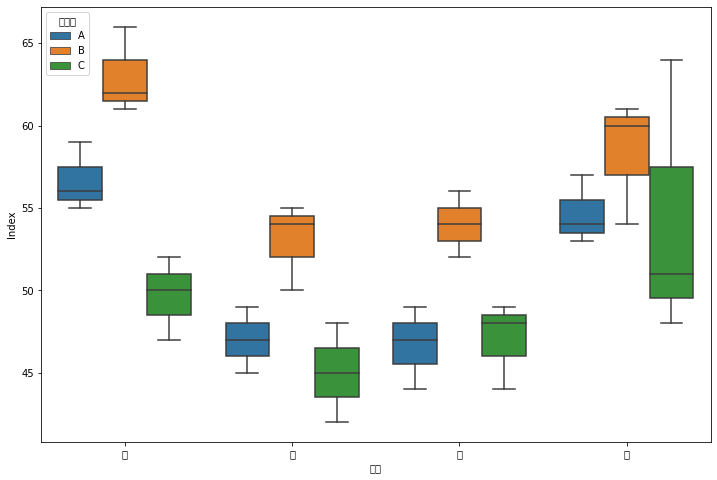

In [50]:
import seaborn as sns# 使用Seaborn主题风格
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.boxplot(x = '班组', y = 'Index', data = df, hue = '生产线')
plt.show()

# 正态性检验(Shapiro-Wilk 检验)

In [51]:
from scipy import stats
sw_test_res = pd.DataFrame()
for i in df1.columns:
    statistic,pvalue = stats.shapiro(df1[i].dropna())
    sw_test_res[i]  = [statistic, pvalue]
sw_test_res.index = ['statistic', 'p_value']
sw_test_res.T.round(3)

,statistic,p_value
"(甲, A)",0.923,0.463
"(甲, B)",0.893,0.363
"(甲, C)",0.987,0.780
"(乙, A)",1.000,1.000
"(乙, B)",0.893,0.363
"(乙, C)",1.000,1.000
"(丙, A)",0.987,0.780
"(丙, B)",1.000,1.000
"(丙, C)",0.893,0.363
"(丁, A)",0.923,0.463


以上各组p值均大于0.05，满足正态分布

In [52]:
import statsmodels.api as sm
anova = ols('Index ~ C(班组) + C() + C(班组)*C(生产线)',data = df).fit()
sm.stats.anova_lm(anova, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(班组),3.0,489.555556,163.185185,13.412481,0.000024
C(生产线),2.0,417.722222,208.861111,17.166667,0.000024
C(班组):C(生产线),6.0,85.611111,14.268519,1.172755,0.353370
Residual,24.0,292.000000,12.166667,NaN,NaN


结果显示：

性别P = 0.000024 < 0.001，表明班组对灯泡产量有显著影响

教育P = 0.000024 < 0.001，表明生产线对灯泡产量有显著影响

交互项具F（6，24）= 1.172755，P = 0.353370，有统计学意义，表明班组与生产线对灯泡产量是否有显著影响

In [56]:
# 事后多重比较 
sm.stats.multicomp.pairwise_tukeyhsd(groups = df.生产线, endog=df.Index).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,5.8333,0.0232,0.6981,10.9685,True
A,C,-2.25,0.5359,-7.3852,2.8852,False
B,C,-8.0833,0.0014,-13.2185,-2.9481,True


由事后比较可得：

A 的影响指数比 B 的人低4.13，P = 0.0232；
A 的影响指数比 C 的人高2.25，P = 0.5359；
B 的影响指数比 C 的人高8.0833，P = 0.0014。

In [63]:
# 性别的单独效应
group_pc_df = pd.DataFrame()
for i in df.班组.unique():
    pc = sm.stats.multicomp.pairwise_tukeyhsd(groups = df.query("班组 == @i").生产线, 
                                              endog=df.query("班组 == @i").Index).summary()
    pc_df = pd.DataFrame(pc, index = [i] * (df.生产线.nunique() + 1), )[1:]
    group_pc_df = group_pc_df.append(pc_df)

group_pc_df.columns = ['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject']
group_pc_df

C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\482424722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_pc_df = group_pc_df.append(pc_df)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\482424722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_pc_df = group_pc_df.append(pc_df)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\482424722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_pc_df = group_pc_df.append(pc_df)
C:\Users\xiaochang\AppData\Local\Temp\ipykernel_16776\482424722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_pc_df = group_pc_df.append(pc_df)


,group1,group2,meandiff,p-adj,lower,upper,reject
甲,A,B,6.3333,0.0427,0.2539,12.4128,True
甲,A,C,-7.0,0.0286,-13.0795,-0.9205,True
甲,B,C,-13.3333,0.0013,-19.4128,-7.2539,True
乙,A,B,6.0,0.0659,-0.4685,12.4685,False
乙,A,C,-2.0,0.6324,-8.4685,4.4685,False
乙,B,C,-8.0,0.0211,-14.4685,-1.5315,True
丙,A,B,7.3333,0.0225,1.3115,13.3552,True
丙,A,C,0.3333,0.9843,-5.6885,6.3552,False
丙,B,C,-7.0,0.0275,-13.0218,-0.9782,True
丁,A,B,3.6667,0.708,-10.1311,17.4644,False


由事后比较可得：

A的影响指数比B的人低6.3333，P = 0.0427； A的影响指数比C的人高7.0，P = 0.0286； B的影响指数比C的人高13.3333，P = 0.0013。

A的影响指数比B的人低6.0，P = 0.0427； A的影响指数比C的人高2.0，P = 0.6324； B的影响指数比C的人高8.0，P = 0.0211。

A的影响指数比B的人高7.3333，P = 0.0225； A的影响指数比C的人低0.3333，P = 0.9843； B的影响指数比C的人高7.0，P = 0.0275。

A的影响指数比B的人低3.6667，P = 0.708； A的影响指数比C的人高0.3333，P = 0.997； B的影响指数比C的人高4.0，P = 0.6659。